<a href="https://colab.research.google.com/github/gustavocxavier/exemplos-codigos-py/blob/main/previsao_notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Início

In [ ]:
# !pip install matplotlib==3.2.2
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline

import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Modelo Linear

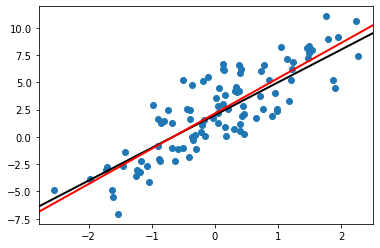

In [ ]:
## Linear Relationship
# Create a fictitious data set
N = 100
x = np.random.normal(loc=0,scale=1,size=N)
epsilon = np.random.normal(loc=0,scale=2,size=N)
B0 = 2
B1 = 3
y = B0 + B1*x + epsilon
# Plot data
plt.scatter(x,y)
plt.axline((0,B0),slope=B1,color='k',linewidth=2)

# Run a linear regression
xx = np.vstack([np.ones(len(x)),x]).T
b0,b1 = np.linalg.lstsq(xx,y,rcond=None)[0]
# Plot response
plt.axline((0,b0),slope=b1,color='r',linewidth=2)

# Rede Neural vs Modelo Linear

In [ ]:
# Consider a neural network
# What is the shape of this network?
HIDDEN = 2
NN =keras.Sequential()
NN.add(keras.layers.Dense(HIDDEN, input_dim=1,activation='relu')) #1 input x
NN.add(keras.layers.Dense(1, activation='linear')) #1 output y

NN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 4         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


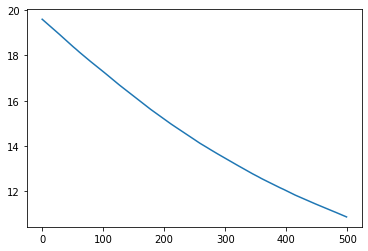

In [ ]:
# State the loss function and optimizer (adam is a good choice usually)
NN.compile(optimizer=keras.optimizers.Adam(),loss='mean_squared_error')

# Fit the model to training data
EPOCHS = 500 # How long to train for
history = NN.fit(x,y,epochs=EPOCHS,verbose=0)
# View improvement over epochs
plt.plot(history.history['loss'])

16/16 [==============================] - 0s 1ms/step


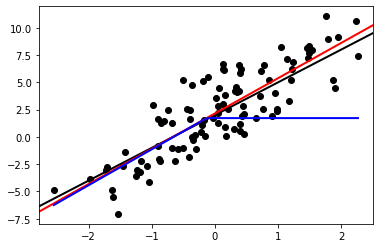

In [ ]:
# Test values
x_test = np.arange(start=min(x),stop=max(x),step=0.01)
y_nn = NN.predict(x_test) # Make predictions on the test data

# Plot data
plt.scatter(x,y,color='k')
plt.axline((0,B0),slope=B1,color='k',linewidth=2) # True relationship
plt.axline((0,b0),slope=b1,color='r',linewidth=2) # Linear regression
plt.plot(x_test,y_nn,color='b',linewidth=2) # Neural network

In [ ]:
# Manually compare linear and neural network fits to "ground truth" y = B0 + B1*x
MSE_lm = np.mean(((b0+b1*x_test) - (B0+B1*x_test))**2)
MSE_NN = np.mean((y_nn.T[0,] - (B0+B1*x_test))**2) # Neural network MSE
NN_evaluate = NN.evaluate(x_test, B0+B1*x_test, verbose=0) # Another way to compute the MSE (losses)

print('MSE da Regressão Linear:', MSE_lm) # Lineaer regression MSE
print('MSE da Rede Neural:', MSE_NN) # Neural network MSE
# print('Comparação NN vs Modelo Linear:', NN_evaluate) # Another way to compute the MSE (losses)
print('NN é superior =', MSE_NN < MSE_lm)

MSE da Regressão Linear: 0.11610983708073029
MSE da Rede Neural: 8.25038218306906
NN é superior = False


16/16 [==============================] - 0s 5ms/step
0.11610983708073029
4.802455474201936
4.802455425262451


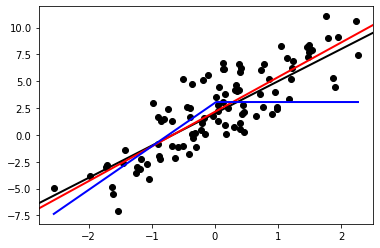

In [ ]:

y_nn = NN.predict(x_test) # Make predictions on the test data

# Plot data
plt.scatter(x,y,color='k')
plt.axline((0,B0),slope=B1,color='k',linewidth=2) # True relationship
plt.axline((0,b0),slope=b1,color='r',linewidth=2) # Linear regression
plt.plot(x_test,y_nn,color='b',linewidth=2) # Neural network

# Test statistics
print(np.mean(((b0+b1*x_test) - (B0+B1*x_test))**2)) # Lineaer regression MSE
print(np.mean((y_nn.T[0,] - (B0+B1*x_test))**2)) # Neural network MSE
print(NN.evaluate(x_test, B0+B1*x_test, verbose=0)) # Another way to compute the MSE (losses)

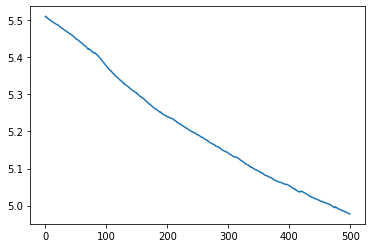

In [ ]:
# What happens if we fit this neural network again?
# Fit the model to training data
EPOCHS = 500 # How long to train for
history = NN.fit(x,y,epochs=EPOCHS,verbose=0)
## View improvement over epochs
plt.plot(history.history['loss'])

In [ ]:
# Go back to cell 3 and consider other network structures
# What are the mathematical formulations for these structures?

## In case you want to save or load a model
#NN.save('path/to/location')
#reload_NN = keras.models.load_model('path/to/location')

# Modelo não linear



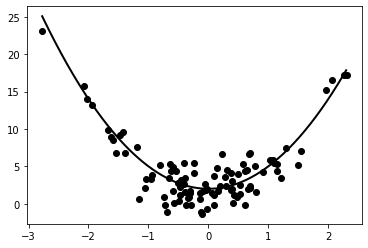

In [ ]:
## Nonlinear relationship
N = 100
x = np.random.normal(loc=0,scale=1,size=N)
epsilon = np.random.normal(loc=0,scale=2,size=N)
B0 = 2
B2 = 3
y = B0 + B2*x**2 + epsilon

x_test = np.arange(start=min(x),stop=max(x),step=0.01)
y_true = B0 + B2*x_test**2

plt.scatter(x,y,color='k')
plt.plot(x_test,y_true,color='k',linewidth=2)

[4.3223207667583905, -0.22856061571088893]
54.39322909679113


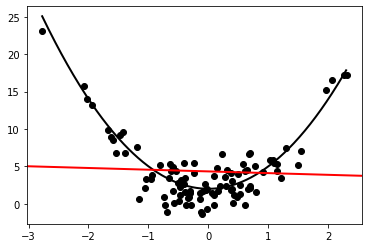

In [ ]:
# Run a linear regression
xx = np.vstack([np.ones(len(x)),x]).T
b0,b1 = np.linalg.lstsq(xx,y,rcond=None)[0]
print([b0,b1])

# Plot response
plt.scatter(x,y,color='k')
plt.plot(x_test,y_true,color='k',linewidth=2)
plt.axline((0,b0),slope=b1,color='r',linewidth=2)

# Compute MSE
print(np.mean(((b0+b1*x_test) - y_true)**2))

[1.666171843651953, 0.2392088743603753, 2.949884040467059]
0.40933707091274474


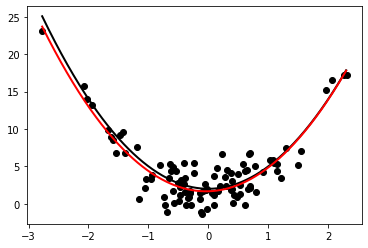

In [ ]:
# Run a quadratic regression (since we know this is the ground truth)
xx = np.vstack([np.ones(len(x)),x,x**2]).T
b0,b1,b2 = np.linalg.lstsq(xx,y,rcond=None)[0]
print([b0,b1,b2])

# Predict on test data
y_quad = b0 + b1*x_test + b2*x_test**2

# Plot response
plt.scatter(x,y,color='k')
plt.plot(x_test,y_true,color='k',linewidth=2)
plt.plot(x_test,y_quad,color='r',linewidth=2)

# Compute MSE
print(np.mean((y_quad - y_true)**2))

# Rede Neural vs Modelo Não Linear

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                32        
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


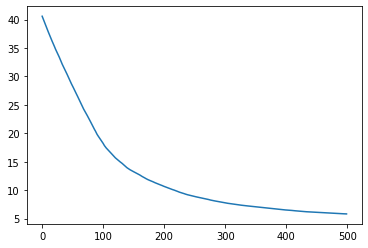

16/16 [==============================] - 0s 2ms/step
54.17644958406122


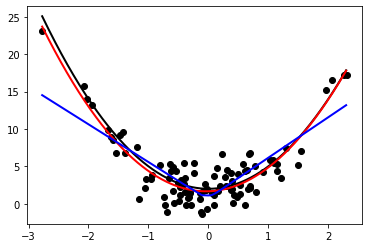

In [ ]:
# Consider a neural network
# What is the shape of this network?
HIDDEN = 16
NN =keras.Sequential()
NN.add(keras.layers.Dense(HIDDEN, input_dim=1,activation='relu')) #1 input x
NN.add(keras.layers.Dense(1, activation='linear')) #1 output y

NN.summary()

# State the loss function and optimizer (adam is a good choice usually)
NN.compile(optimizer=keras.optimizers.Adam(),loss='mean_squared_error')

# Fit the model to training data
EPOCHS = 500 # How long to train for
history = NN.fit(x,y,epochs=EPOCHS,verbose=0)
# View improvement over epochs
plt.plot(history.history['loss'])
plt.show()

# Make predictions on the test data
y_NN = NN.predict(x_test)

# Plot response
plt.scatter(x,y,color='k')
plt.plot(x_test,y_true,color='k',linewidth=2)
plt.plot(x_test,y_quad,color='r',linewidth=2)
plt.plot(x_test,y_NN,color='b',linewidth=2)

# Compute MSE
print(np.mean((y_NN - y_true)**2))

# Deep Neural Network

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                32        
                                                                 
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


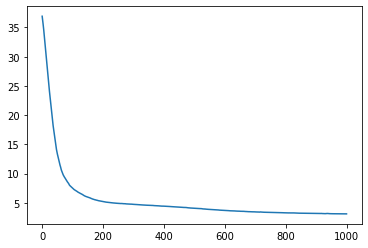

16/16 [==============================] - 0s 2ms/step
73.81824071420971


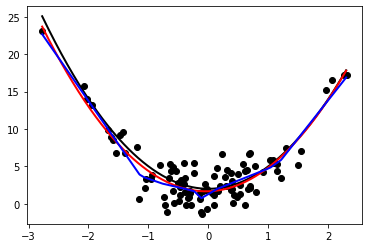

In [ ]:
# How about a *deep* neural network
# What is the structure of this neural network?
# Consider a neural network
# What is the shape of this network?
HIDDEN = 16
NN =keras.Sequential()
NN.add(keras.layers.Dense(HIDDEN, input_dim=1,activation='relu')) #1 input x
NN.add(keras.layers.Dense(HIDDEN, activation='relu'))
NN.add(keras.layers.Dense(1, activation='linear')) #1 output y

NN.summary()

# State the loss function and optimizer (adam is a good choice usually)
NN.compile(optimizer=keras.optimizers.Adam(),loss='mean_squared_error')

# Fit the model to training data
EPOCHS = 1000 # How long to train for (let this train longer)
history = NN.fit(x,y,epochs=EPOCHS,verbose=0)
# View improvement over epochs
plt.plot(history.history['loss'])
plt.show()

# Make predictions on the test data
y_NN = NN.predict(x_test)

# Plot response
plt.scatter(x,y,color='k')
plt.plot(x_test,y_true,color='k',linewidth=2)
plt.plot(x_test,y_quad,color='r',linewidth=2)
plt.plot(x_test,y_NN,color='b',linewidth=2)

# Compute MSE
print(np.mean((y_NN - y_true)**2))

# Let's go back and consider other network structures
# What are the mathematical formulations for these structures?

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 16)                336       
                                                                 
 dense_8 (Dense)             (None, 16)                272       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________


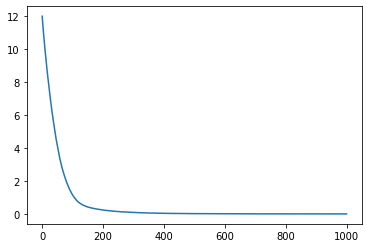

0.00022051986888982356
2/2 [==============================] - 0s 7ms/step
5.0261430740356445


In [ ]:
## But be wary of overfitting
# Generate random data
N = 100
M = 20 # Larger number of inputs
x = np.random.normal(loc=0,scale=1,size=(N,M))
epsilon = np.random.normal(loc=0,scale=1,size=N)
B0 = 0
B = np.hstack([3,0.75,np.zeros(M-2)])
y = B0 + x@B + epsilon

np.column_stack((y,x)) # To concatenate the data

train = np.random.choice(int(N) , size=int(N/2) , replace=False)

HIDDEN = 16
NN =keras.Sequential()
NN.add(keras.layers.Dense(HIDDEN, input_dim=M,activation='tanh')) #M inputs x
NN.add(keras.layers.Dense(HIDDEN, activation='tanh'))
NN.add(keras.layers.Dense(1, activation='linear')) #1 output y

NN.summary()

# State the loss function and optimizer (adam is a good choice usually)
NN.compile(optimizer=keras.optimizers.Adam(),loss='mean_squared_error')

# Fit the model to training data
EPOCHS = 1000 # How long to train for (let this train longer)
history = NN.fit(x[train,],y[train],epochs=EPOCHS,verbose=0) # Specifically on training data
# View improvement over epochs
plt.plot(history.history['loss'])
plt.show()
print(history.history['loss'][-1]) # Training MSE

# Make predictions on the test data
x_test = np.delete(x , train , axis=0)
y_test = NN.predict(x_test)
y_true = np.delete(y , train)
print(NN.evaluate(x_test , y_true , verbose=0)) # Test MSE
# If we have test error much larger than the training error then we are overfitting

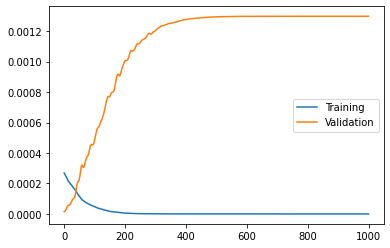

8.963774817891124e-13
0.0012979109305888414
2/2 [==============================] - 0s 5ms/step
5.103860378265381


In [ ]:
# Evaluate fit earlier than test data:
history = NN.fit(x[train,],y[train],epochs=EPOCHS,validation_split=0.2,verbose=0) # Split training data to do an early "test"
# View improvement over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.show()
print(history.history['loss'][-1]) # Training MSE
print(history.history['val_loss'][-1]) # Validation loss

# Make predictions on the test data
x_test = np.delete(x , train , axis=0)
y_test = NN.predict(x_test)
y_true = np.delete(y , train)
print(NN.evaluate(x_test , y_true , verbose=0)) # Test MSE
# If we have test error much larger than the training error then we are overfitting

# Go back up to see if we can do better with different networks